<h2>Import libraries</h2>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

<h2>Load your CSV file</h2>

In [5]:
df = pd.read_csv('/content/Uber-Jan-Feb-FOIL.csv')

<h2>Basic checks</h2>

In [6]:
df.head()       # First 5 rows
df.info()       # Data types & nulls
df.describe()   # Stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2>Total Trips Over Time</h2>

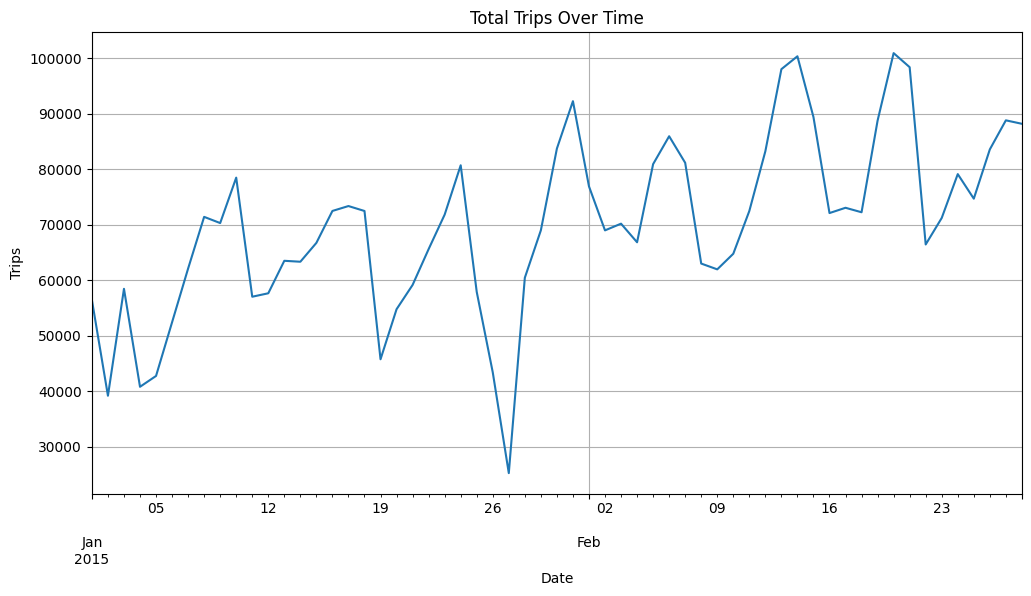

In [9]:
plt.figure(figsize=(12,6))
df.groupby('date')['trips'].sum().plot()
plt.title("Total Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.grid(True)
plt.show()

<h2>Active Vehicles Over Time</h2>

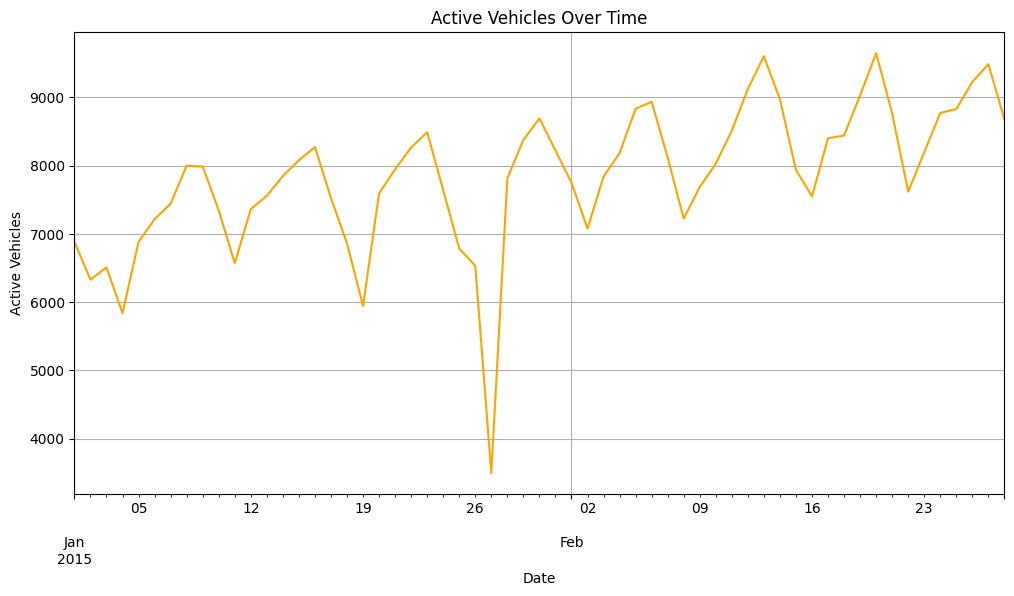

In [10]:
plt.figure(figsize=(12,6))
df.groupby('date')['active_vehicles'].sum().plot(color="orange")
plt.title("Active Vehicles Over Time")
plt.xlabel("Date")
plt.ylabel("Active Vehicles")
plt.grid(True)
plt.show()

<h2>Trips vs Active Vehicles (scatter)</h2>

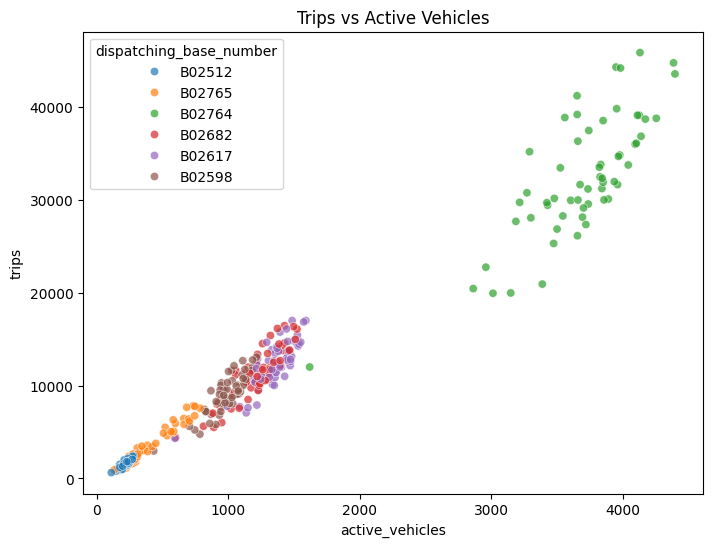

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='dispatching_base_number', alpha=0.7)
plt.title("Trips vs Active Vehicles")
plt.show()

<h2>Top 10 Bases by Total Trips</h2>

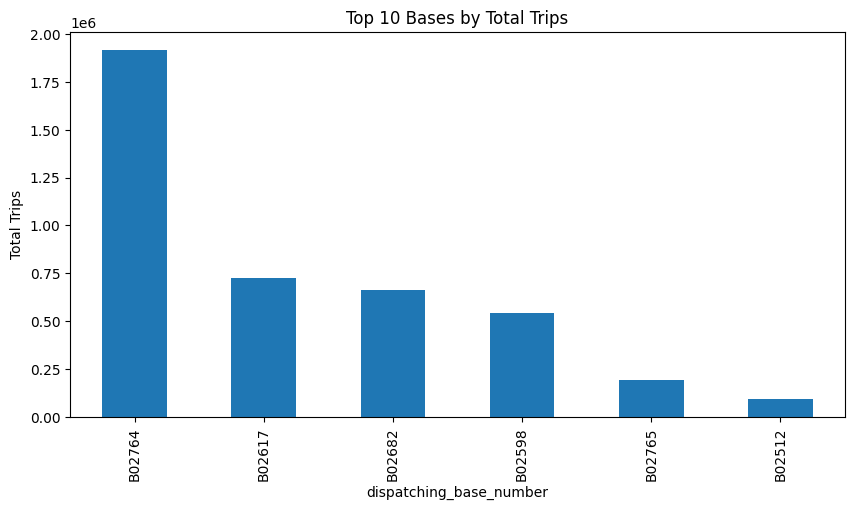

In [12]:
top_bases = df.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False).head(10)
top_bases.plot(kind='bar', figsize=(10,5), title="Top 10 Bases by Total Trips")
plt.ylabel("Total Trips")
plt.show()

<h2>Interactive Line Chart with Plotly</h2>

In [13]:
fig = px.line(df, x='date', y='trips', color='dispatching_base_number', title="Trips by Base Over Time")
fig.show()

<h2>Average Trips per Vehicle Over Time</h2>

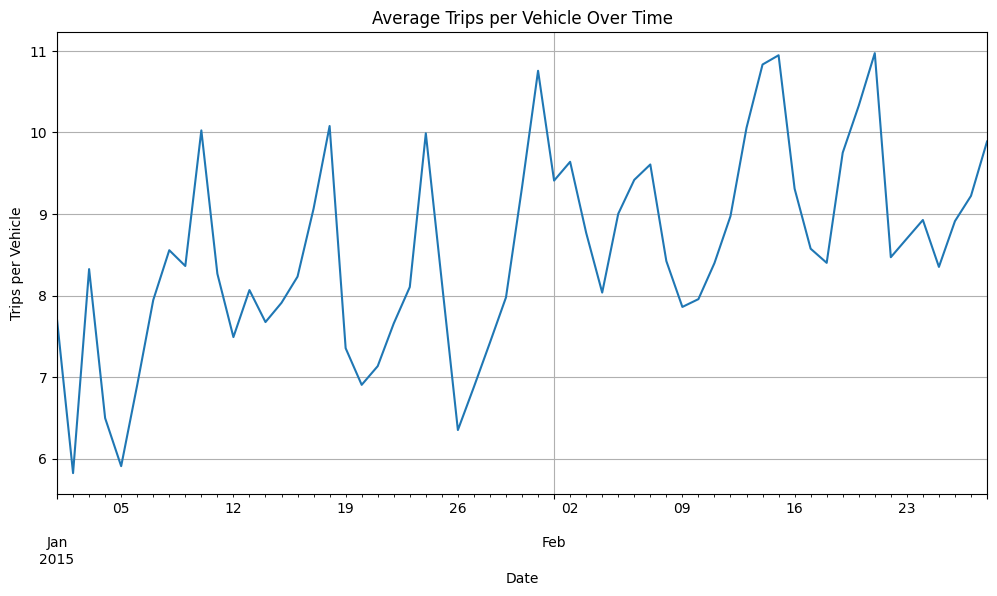

In [14]:
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']
plt.figure(figsize=(12,6))
df.groupby('date')['trips_per_vehicle'].mean().plot()
plt.title("Average Trips per Vehicle Over Time")
plt.xlabel("Date")
plt.ylabel("Trips per Vehicle")
plt.grid(True)
plt.show()

<h2>Distribution of Trips (Histogram)</h2>

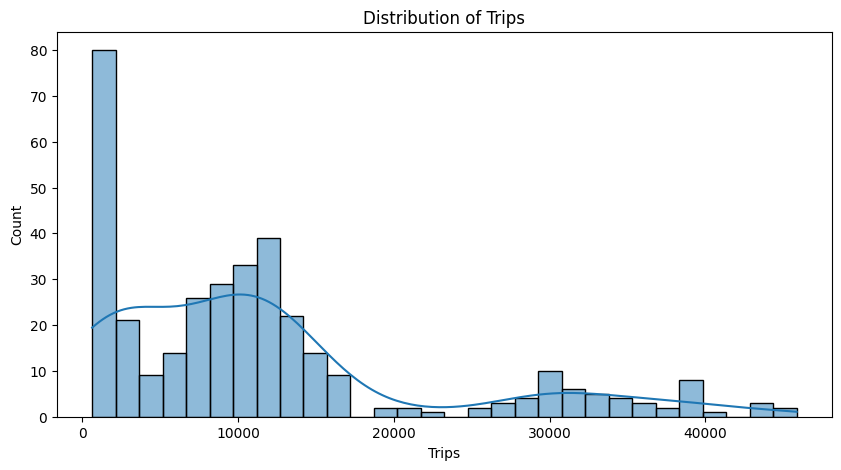

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['trips'], bins=30, kde=True)
plt.title("Distribution of Trips")
plt.xlabel("Trips")
plt.show()

<h2>Distribution of Active Vehicles (Histogram)</h2>

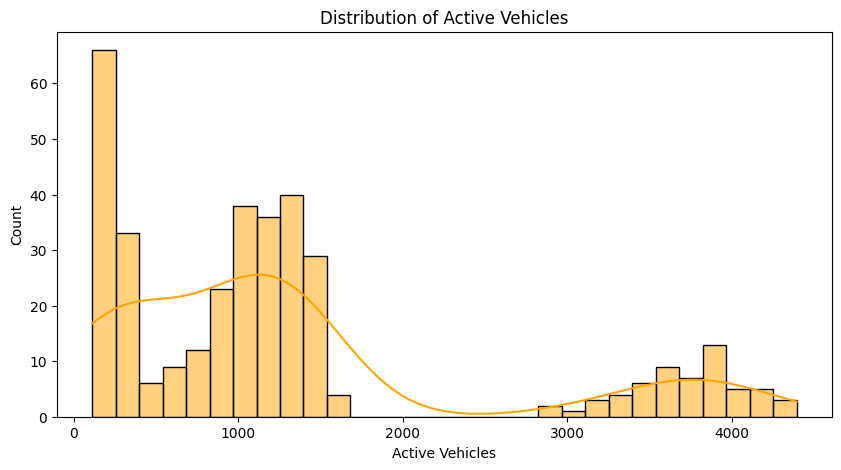

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['active_vehicles'], bins=30, kde=True, color='orange')
plt.title("Distribution of Active Vehicles")
plt.xlabel("Active Vehicles")
plt.show()

<h2>Trips per Base (Boxplot)</h2>

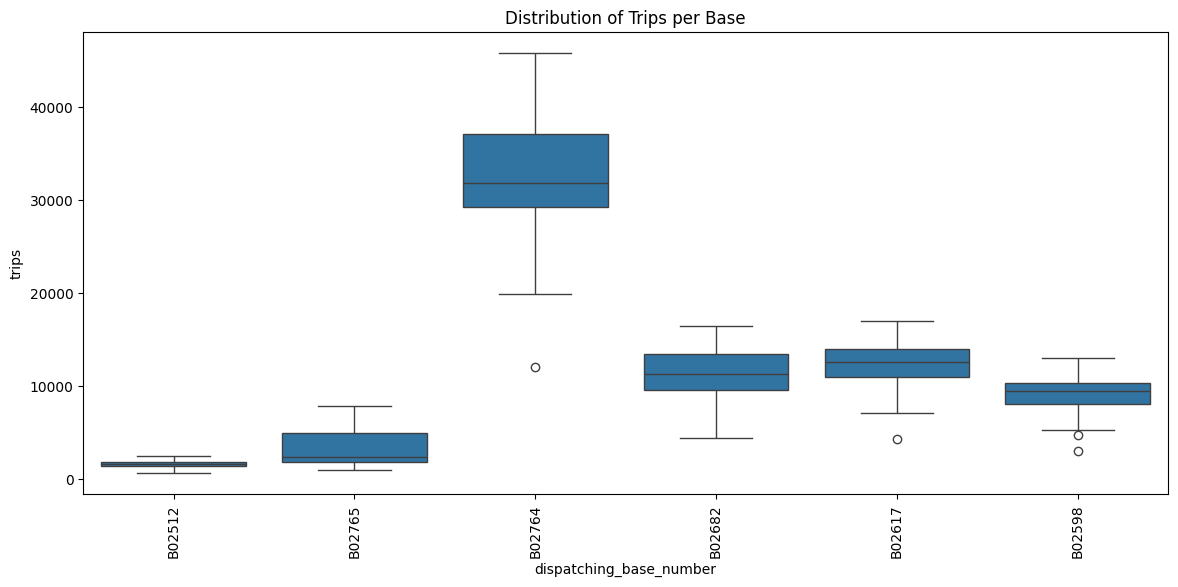

In [17]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='dispatching_base_number', y='trips')
plt.title("Distribution of Trips per Base")
plt.xticks(rotation=90)
plt.show()

<h2>Heatmap of Daily Correlation (Vehicles vs Trips)</h2>

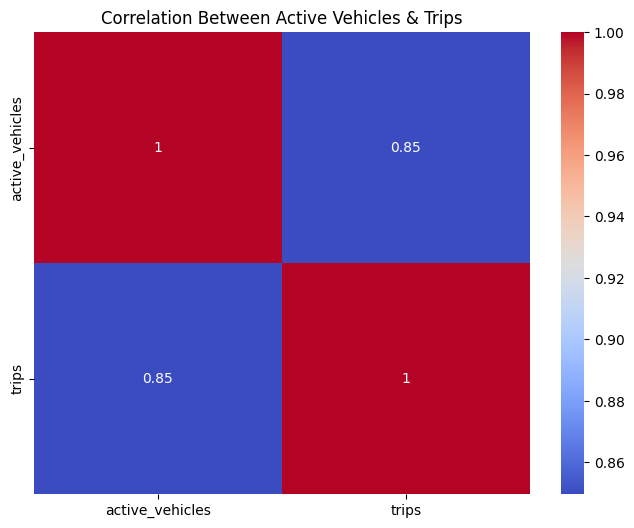

In [18]:
plt.figure(figsize=(8,6))
daily_corr = df.groupby('date')[['active_vehicles','trips']].sum().corr()
sns.heatmap(daily_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Active Vehicles & Trips")
plt.show()

<h2>Moving Average of Trips (Trend Smoothing)</h2>

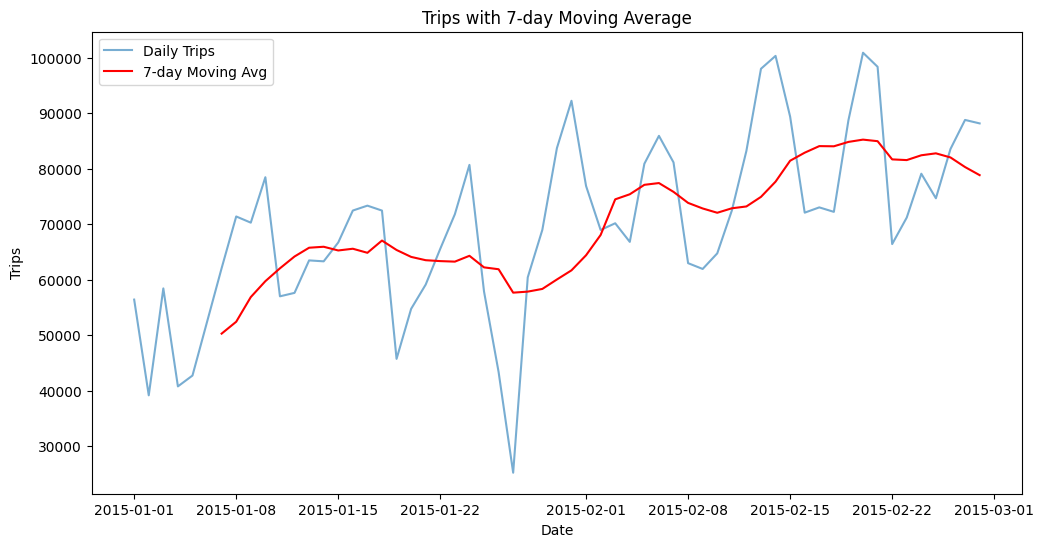

In [19]:
df_daily = df.groupby('date')['trips'].sum().reset_index()
df_daily['7day_avg'] = df_daily['trips'].rolling(7).mean()
plt.figure(figsize=(12,6))
plt.plot(df_daily['date'], df_daily['trips'], label="Daily Trips", alpha=0.6)
plt.plot(df_daily['date'], df_daily['7day_avg'], color='red', label="7-day Moving Avg")
plt.title("Trips with 7-day Moving Average")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.legend()
plt.show()

<h2>Stacked Area Chart (Trips by Base Over Time)</h2>

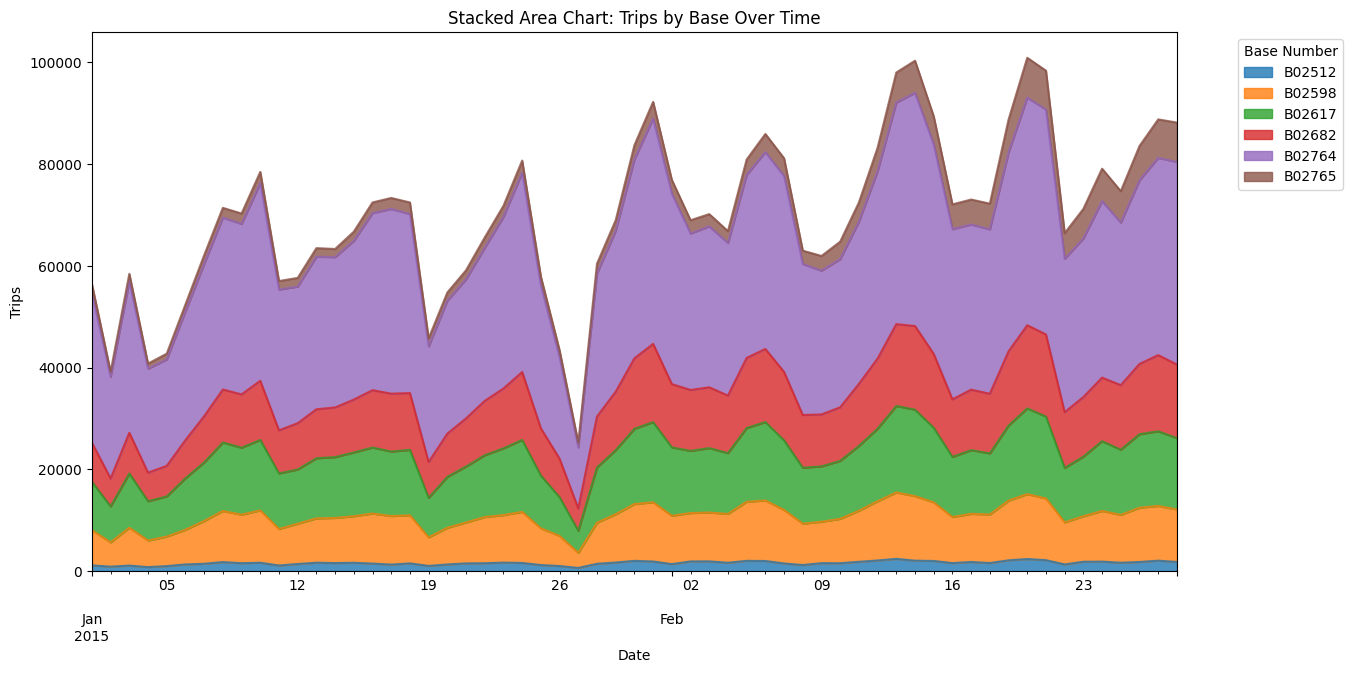

In [20]:
df_grouped = df.groupby(['date','dispatching_base_number'])['trips'].sum().reset_index()
df_pivot = df_grouped.pivot(index='date', columns='dispatching_base_number', values='trips').fillna(0)

df_pivot.plot.area(figsize=(14,7), alpha=0.8)
plt.title("Stacked Area Chart: Trips by Base Over Time")
plt.ylabel("Trips")
plt.xlabel("Date")
plt.legend(title="Base Number", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h2>Violin Plot (Trips per Base)</h2>

/tmp/ipython-input-809552988.py:2: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



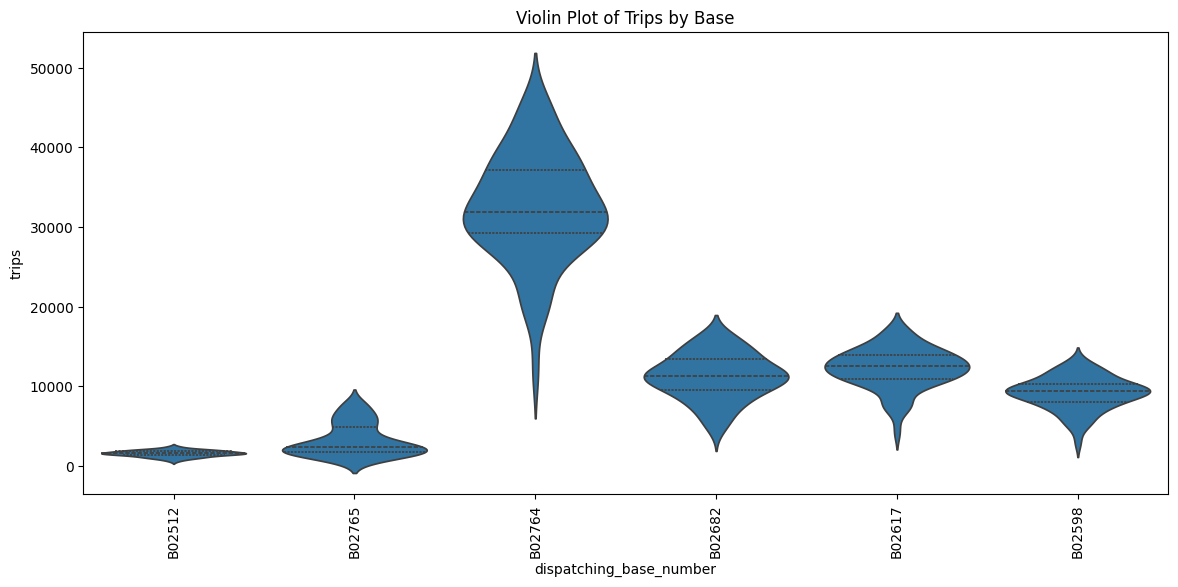

In [21]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x='dispatching_base_number', y='trips', inner='quartile', scale='width')
plt.title("Violin Plot of Trips by Base")
plt.xticks(rotation=90)
plt.show()

<h2>Heatmap Calendar (Trips by Day of Week vs Month)</h2>

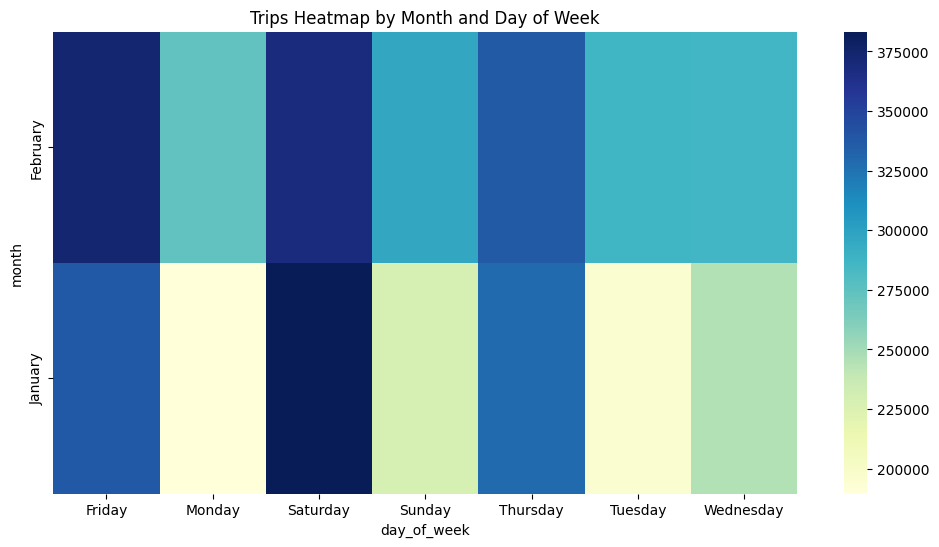

In [23]:
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
pivot = df.groupby(['month','day_of_week'])['trips'].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title("Trips Heatmap by Month and Day of Week")
plt.show()

<h2>Treemap of Trips by Base</h2>

In [24]:
import plotly.express as px
base_trips = df.groupby('dispatching_base_number')['trips'].sum().reset_index()
fig = px.treemap(base_trips, path=['dispatching_base_number'], values='trips',
                 title="Treemap of Trips by Base")
fig.show()

<h2>Hexbin Plot (Density of Trips vs Vehicles)</h2>

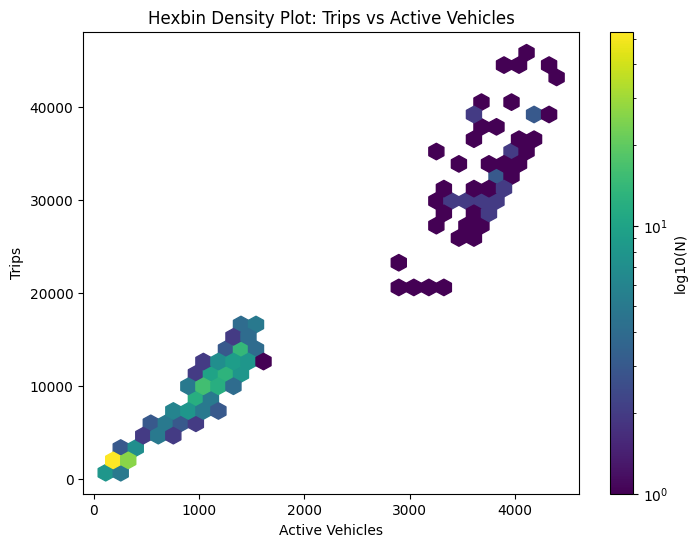

In [25]:
plt.figure(figsize=(8,6))
plt.hexbin(df['active_vehicles'], df['trips'], gridsize=30, cmap='viridis', bins='log')
plt.colorbar(label="log10(N)")
plt.title("Hexbin Density Plot: Trips vs Active Vehicles")
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.show()

<h2>Pairplot (Relationship between numeric features)</h2>

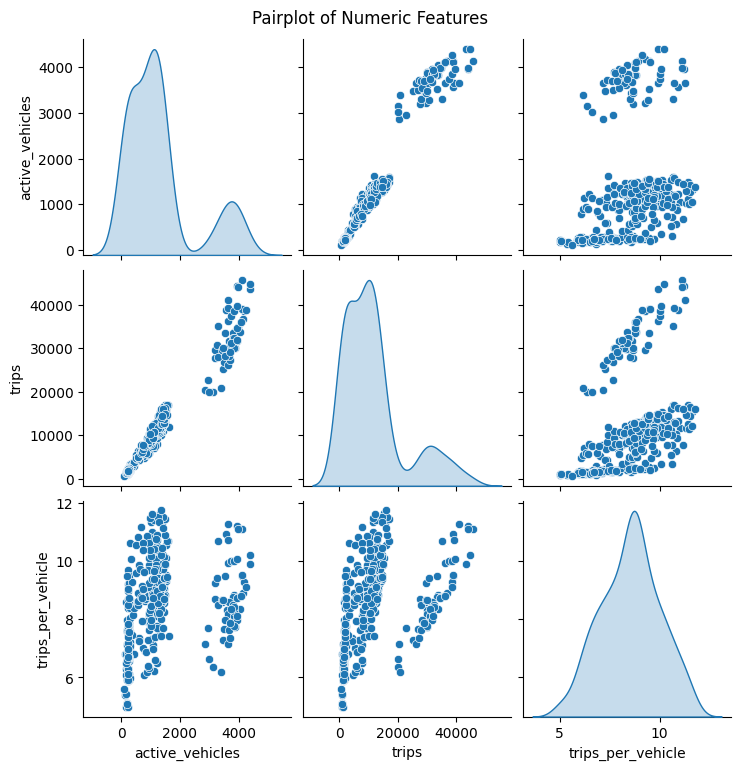

In [26]:
sns.pairplot(df[['active_vehicles','trips','trips_per_vehicle']], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

<h2>Saving the processed data</h2>

In [28]:
df.to_csv('/content/processed_output.csv', index=False)
print("Processed file saved ✅")

Processed file saved ✅
